# ADS-502 Final Project: Heart Disease Detection

## Group #2
- Nava Roohi
- Angela Zhang
- Nhan (Jimmy) Nguyen

------
## The Data Science Methodology/ Data Mining Process
1.  **Problem Understanding/ Data Understanding Phase** 
2. **Data Preparation Phase**
3. **Exploratory Data Analysis Phase** 
4. **Setup Phase**
5. **Modeling Phase** 
6. **Evaluation Phase** 

-----
### 1. Problem Understanding Phase
Business Understanding

**i.Determine business objectives**
    
1. The business objective of this project is to build a classifier that will be able to accurately detect heart disease in patients.
2. Using the information in the data set, we want to analyze relationships between variables and having heart disease. This will provide insight on which key variables is associated with heart disease. 
3. We want to take a closer look at patients who are correctly predicted as having heart disease to better understand symptoms and detect early signs we may be able to flag. 
4. By identifying patients who will likely be diagnose with heart disease before its too late, physicians may be able save significant lives. 
5. We can reduce the number of deaths caused by heart diseases.
        
**ii. Background** 
 1. Heart disease has been responsible for millions of deaths each year among the world. In fact, health problems associated with the heart have become the leading cause of death in the past decades for both males and females. According to the Disease Control and Prevention Center, about 61,000 people die of heart disease in the United States annually that is 1 in every 4 deaths. Heart disease is one of the biggest concerns and having the capability to accurately detect heart disease would be extremely essential. So we will use data mining techniques and algorithms to predict heart disease. Heart disease detection will be advantageous and insightful, so that health professionals can take the proper action ahead of time for earlier treatments leading to prevention.
        
**iii. Business success criteria** 
 1. Reduce the number of deaths caused by heart diseases by building a classification model 
    
 **iv. Inventory of resources** 
1. Data dictionary available in folder (Terminology)


2. Sample Research paper in folder


3. Direct data resource: https://archive.ics.uci.edu/ml/datasets/heart+disease 


4. Secondary data resource: https://www.kaggle.com/ronitf/heart-disease-uci 



**v. Risks and Contingencies** 
1. Be careful for outliers


2. Be careful for high dimensionality 


3. No missing values 


4. Is there a need to convert dummy variables or discretization?



**vi. Determine Data Mining Goals**
1. Data mining problem type: binary classification
    1. Models we are allowed to used:  _Gaussian Naive Bayes, Logistic Regression, Random Forests_
    
    
2. Data mining Outputs requires results to be
    1. Positive Class label = ‘1’ – presence of heart disease
    2. Negative Class label = ‘0’ – absence of heart disease 
    
            
**vii.  Data Mining success criteria**
1. A good measure of the Harmonic Mean – F1 Score
    1. Good performance with Precision
    2. Good performance with Recall
    3. Needs to beat baseline model accuracy (all negative model)
    


------
### 2. Data Preparation Phase

#### 2.1 Packages

In [1]:
import pandas as pd # pandas package 
import numpy as np # numpy package
import matplotlib.pyplot as plt # matplotlib package
import seaborn as sns # seaborn package
from math import * # math package
from sklearn.model_selection import train_test_split # train test split
from scipy.stats import ttest_ind # t test package
from scipy.stats import norm # norm package
from sklearn.metrics import * # import model evaluation package
from sklearn.naive_bayes import GaussianNB # import gaussian naive bayes model 
from sklearn.linear_model import LogisticRegression # logistic regression model
from sklearn.ensemble import RandomForestClassifier # random forest model
from sklearn.preprocessing import MinMaxScaler # import standardization package
from sklearn.model_selection import cross_val_score # cross validation
from sklearn.model_selection import KFold # number k runs
from sklearn.metrics import confusion_matrix # confusion matrix
import warnings # warnings package
warnings.filterwarnings('ignore') # hide warnings
%matplotlib inline  
plt.style.use('seaborn') # use seaborn style for plots

#### 2.2 Dataset

In [2]:
df = pd.read_csv("heart.csv") # original data
df.head() # show first rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### 2.3 Data Report 

- **Continuous Features**

In [3]:
def cont_data(df):
    '''
    This function takes in a dataframe as input and looks at the continuous variables to calculate 
    the percentage of missing values, the cardinality, the lowest values, the highest values,
    mean, median, and etc.
    '''

    colnames = ['Feature', 'Count', 'Miss. %', 'Card', 'Min',
                '1st Qrt.', 'Mean', 'Median', '3rd Qrt.', 'Max', 'Std Dev.']
    data_table = pd.DataFrame(columns = colnames)
    features = list(df.columns)
    for i in features:
        feature = i #feature name 
        count = len(df[feature]) # number of rows
        miss = df[feature].isnull().sum()/count  # number of missing values as percentage
        card = len(df[feature].unique()) # cardinality 
        min_value = df[feature].min()
        first_qrt = df[feature].quantile([0.25]).values[0] # first quantitle
        mean = round(df[feature].mean(),2) # mean
        median = df[feature].median() # median
        third_qrt = df[feature].quantile([0.75]).values[0] # third quantile 
        max_value = df[feature].max() # max value
        std_value = round(df[feature].std(ddof=1),2) # standard deviation
        rows = [feature, count, miss, card, min_value, first_qrt, mean, median, third_qrt, max_value, std_value]
        data_table_length = len(data_table)
        data_table.loc[data_table_length] = rows
    return data_table

cont_feat = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] # continuous variables
cont_df = df[cont_feat] # select these columns only
continuous_data = cont_data(cont_df) # perform function on data frame
continuous_data # print data frame

,Feature,Count,Miss. %,Card,Min,1st Qrt.,Mean,Median,3rd Qrt.,Max,Std Dev.
0,age,303,0.0,41,29,47.5,54.37,55.0,61.0,77,9.08
1,trestbps,303,0.0,49,94,120.0,131.62,130.0,140.0,200,17.54
2,chol,303,0.0,152,126,211.0,246.26,240.0,274.5,564,51.83
3,thalach,303,0.0,91,71,133.5,149.65,153.0,166.0,202,22.91
4,oldpeak,303,0.0,40,0,0.0,1.04,0.8,1.6,6.2,1.16


- **Categorical Features**

In [4]:
def cat_data(df):
    '''
    This functions takes in a dataframe and calculates the count, percentage of missing values
    cardinality, mode, mode frequency, and etc for categorical variables
    '''
    colnames = ['Feature', 'Count', 'Miss. %', 'Card', 'Mode', 
                'Mode Freq.', 'Mode %', '2nd Mode', '2nd Mode Freq', '2nd Mode %']
    data_table = pd.DataFrame(columns = colnames)
    features = list(df.columns)
    for i in features:
        feature = i #feature name 
        count = len(df[feature]) # number of rows
        miss = df[feature].isnull().sum()/count  # number of missing values as percentage
        card = len(df[feature].unique()) # cardinality 
        mode = list(df[feature].value_counts().sort_values(ascending = False).index)[0]# most common value
        mode_frq = list(df[feature].value_counts().sort_values(ascending = False))[0] # counts of most common value
        mode_pct = round(mode_frq/len(df[feature]),2) # percentage of most common value 
        snd_mode = list(df[feature].value_counts().sort_values(ascending = False).index)[1] # Second most common value
        snd_mode_frq = list(df[feature].value_counts().sort_values(ascending = False))[1] # counts of second-most common value
        snd_mode_pct = round(snd_mode_frq/len(df[feature]),2) # percentage of second- most common value
        rows = [feature, count, miss, card, mode, mode_frq, mode_pct, snd_mode, snd_mode_frq, snd_mode_pct] # compile variables as a list
        data_table_length = len(data_table) # count the current row of table
        data_table.loc[data_table_length] = rows # add each feature as a row
    return data_table # return as dataframe 

cat_feat = list(df.columns.difference(df[cont_feat].columns)) # find categorical columns
cat_df = df[cat_feat] # select these categorical columns as a new data frame

categorical_data = cat_data(cat_df) # call function on categorical data frame
categorical_data # print categorical calculations

,Feature,Count,Miss. %,Card,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
0,ca,303,0.0,5,0,175,0.58,1,65,0.21
1,cp,303,0.0,4,0,143,0.47,2,87,0.29
2,exang,303,0.0,2,0,204,0.67,1,99,0.33
3,fbs,303,0.0,2,0,258,0.85,1,45,0.15
4,restecg,303,0.0,3,1,152,0.50,0,147,0.49
5,sex,303,0.0,2,1,207,0.68,0,96,0.32
6,slope,303,0.0,3,2,142,0.47,1,140,0.46
7,target,303,0.0,2,1,165,0.54,0,138,0.46
8,thal,303,0.0,4,2,166,0.55,3,117,0.39


#### 2.4 Identify Outliers

In [5]:
df.head() # look at first five rows again

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Variable: Trestbps (Resting Blood Pressure)**

As a general guide: ideal blood pressure is considered to be between 90/60mmHg and 120/80mmHg. 

High blood pressure is considered to be 140/90mmHg or higher.

Low blood pressure is considered to be 90/60mmHg or lower.

https://www.nhs.uk/common-health-questions/lifestyle/what-is-blood-pressure/

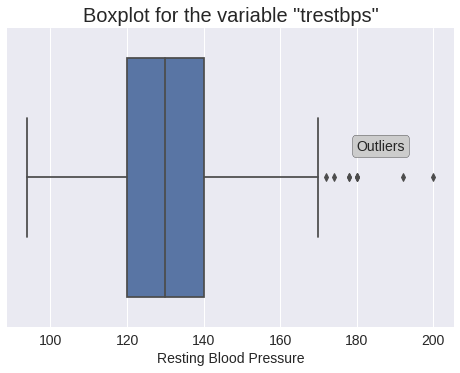

In [6]:
# box plot of the variable resting blood pressure 
ax = sns.boxplot(df.trestbps)

# notation indicating an outlier
ax.annotate('Outliers', xy=(195,0), xytext=(180,-0.09), fontsize=14, bbox = dict(boxstyle="round", fc="0.8"))

# xtick, label, and title
plt.xticks(fontsize=14)
plt.xlabel('Resting Blood Pressure', fontsize=14)
plt.title('Boxplot for the variable "trestbps"', fontsize=20)
plt.show()

**Variable: Chol (Serum Cholestoral om mg/dl)**


"A serum cholesterol level is a measurement of certain elements in the blood, including the amount of high- and low-density lipoprotein cholesterol (HDL and LDL) in a person's blood. 

Serum cholesterol levels also show the amount of triglycerides present. Triglycerides are another lipid that can be measured in the blood."


https://www.medicalnewstoday.com/articles/321519


Cholesterol levels for adults

- Total cholesterol levels less than 200 milligrams per deciliter (mg/dL) are considered desirable for adults. A reading between 200 and 239 mg/dL is considered borderline high and a reading of 240 mg/dL and above is considered high.

https://www.medicalnewstoday.com/articles/315900#recommended-levels

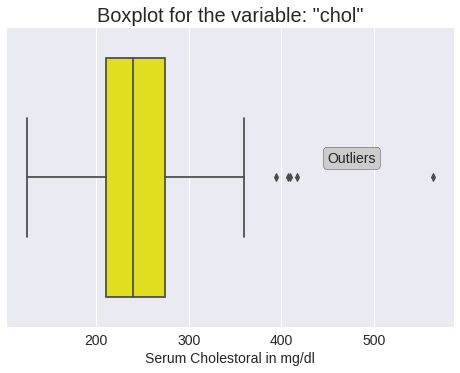

In [7]:
# box plot of the variable chol
ax = sns.boxplot(df.chol, color = "yellow")

# notation indicating an outlier
ax.annotate('Outliers', xy=(195,0), xytext=(450,-0.05), fontsize=14, bbox = dict(boxstyle="round", fc="0.8"))

# xtick, label, and title
plt.xticks(fontsize=14)
plt.xlabel('Serum Cholestoral in mg/dl', fontsize=14)
plt.title('Boxplot for the variable: "chol"', fontsize=20)
plt.show()

**Variable: Thalach (Maximum Heart rate achieved)**

"You can calculate your maximum heart rate by subtracting your age from 220. For example, if you're 45 years old, subtract 45 from 220 to get a maximum heart rate of 175. This is the average maximum number of times your heart should beat per minute during exercise."

https://www.mayoclinic.org/healthy-lifestyle/fitness/in-depth/exercise-intensity/art-20046887


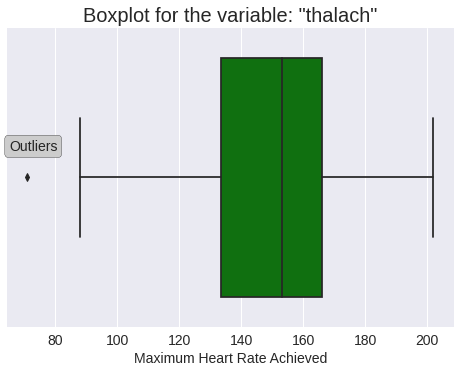

In [8]:
# box plot of the variable chol
ax = sns.boxplot(df.thalach, color = "green")

# notation indicating an outlier
ax.annotate('Outliers', xy=(195,0), xytext=(65,-0.09), fontsize=14, bbox = dict(boxstyle="round", fc="0.8"))

# xtick, label, and title
plt.xticks(fontsize=14) # size 14 for font
plt.xlabel('Maximum Heart Rate Achieved', fontsize=14) # x label
plt.title('Boxplot for the variable: "thalach"', fontsize=20) # y lable
plt.show() # plot

**Outliers Conclusion**

- Although there were key noticable outliers, we want to keep these supposedly "outliers" to make sure our model is able to detect any unusual cases of physical conditions for better classifications
- Therefore, no outliers will be taken out

#### 2.5 Check for Missing Values

In [9]:
df.isna().sum() # sum the number of missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Missing Data Conclusion**
- No missing values in this data set

#### 2.6 Check for Inconsistent Values

In [10]:
# columns
cols = list(df.columns) # list the columns
for i in cols:
    # Name of column
    print("\nColumn: ", i)
    
    #Unique Values
    print("Values: ", df[i].unique())
    # counting unique values
    n = len(pd.unique(df[i]))
    print("No.of.unique values :", n)


Column:  age
Values:  [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
No.of.unique values : 41

Column:  sex
Values:  [1 0]
No.of.unique values : 2

Column:  cp
Values:  [3 2 1 0]
No.of.unique values : 4

Column:  trestbps
Values:  [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
No.of.unique values : 49

Column:  chol
Values:  [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 2

**Inconsistent Values Conclusion**
- All values are valid without and data entry errors

#### 2.7 Duplicate Rows 

In [11]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = df[df.duplicated(keep = 'first')] # find duplicate rows and keep only the original
dup_index = duplicateRowsDF.index # find the indexes of the duplicate rows

print("Duplicate Rows except first occurrence based on all columns are : \n", duplicateRowsDF) # print duplicate rows


Duplicate Rows except first occurrence based on all columns are : 
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1  


**Duplicate Rows Conclusion**
- We only found one exact duplicate row of index 163 which is found at index 164, so we decided to drop that row only

In [12]:
# return a new dataframe by dropping a 
# row 'c' from dataframe
df = df.drop(dup_index)

# returns empty data frame because there are no longer any duplicate rows
df[df.duplicated(keep = 'first')]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


#### 2.8 Reclassifying categorical variables.
- The following will be reclassified to help with exploratory data analysis with the original data meaning instead of discrete categorical values 

**Sex Variable: "sex"** 

In [13]:
df['sex'] = df.apply(lambda x: 'male' if x['sex'] == 1 else 'female', axis = 1) # convert values from column into strings
list(df.sex.unique()) # list unique values

['male', 'female']

**Chest Pain Variable: "cp"**

In [14]:
def cp_bins(x): 
    '''
    A function that takes in a value and returns a string depending on which conditions it returns true
    '''
    if x == 1: 
        return 'typical angina'
    elif x == 2:
        return 'atypical angina'
    elif x == 3:
        return 'non-anginal pain'
    else:
        return 'asymptomatic'

In [15]:
df['cp'] = df.apply(lambda x: cp_bins(x['cp']), axis = 1) # call function onto each value of 'cp' column
list(df.cp.unique()) # list the unique values

['non-anginal pain', 'atypical angina', 'typical angina', 'asymptomatic']

**Diabetes Variable: "fbs"**


In [16]:
df['fbs'] = df.apply(lambda x: 'Diabetes' if x['fbs'] == 1 else 'Prediabetes or Normal', 
                     axis = 1) # convert numerical data to categorical string data
list(df.fbs.unique()) # list unique values

['Diabetes', 'Prediabetes or Normal']

**Resting Electrocardiographic Results**

In [17]:
def restecg_bins(x):
    '''
    A function that takes in a value and returns a string depending on which conditions it returns true
    '''
    if x == 0: 
        return 'Normal'
    elif x == 1:
        return 'Abornomality'
    else:
        return 'Probable Hypertrophy'

In [18]:
# call function on 'restecg' column
df['restecg'] = df.apply(lambda x: restecg_bins(x['restecg']), axis = 1) 
list(df.restecg.unique()) # list unique values

['Normal', 'Abornomality', 'Probable Hypertrophy']

**Exercuse Induced Angina**

In [19]:
# call function on 'exang' column
df['exang'] = df.apply(lambda x: 'Exercise Angina' if x['exang'] == 1 else 'No Ex Angina', 
                     axis = 1) 
list(df.exang.unique()) # list unique values

['No Ex Angina', 'Exercise Angina']

**Reclassifying Categorical Variables Conclusion**
- We convert the following variables with discrete numerical values back to the original categorical value for better context and for EDA
1. Sex ("sex")
2. Chest Pain ("cp")
3. Diabetes ("fbs")
4. Resting Electrocardiographic Results ("restecg")
5. Exercise Induced Angina ("exang")

--------

### 3. Exploratory Data Analysis Phase

#### 3.1 Exploring Age

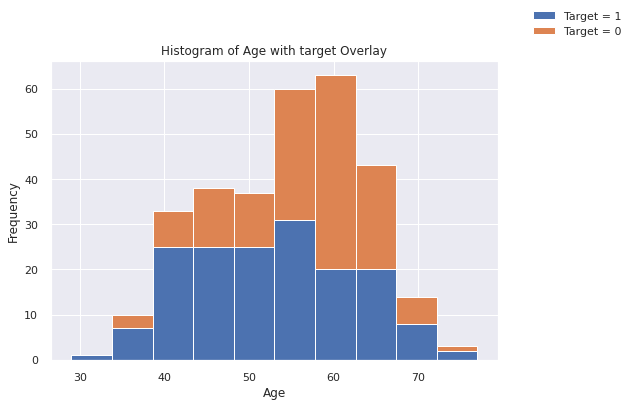

In [20]:
sns.set_theme(style = "darkgrid")
# Look at the counts of positive cases by age
heart_age_y = df[df.target == 1]['age']
# Look at the counts of negative cases by age
heart_age_n = df[df.target == 0]['age']
# Create bins and plot histogram for age groups with taret overlay
(n, bins, patches) = plt.hist([heart_age_y, heart_age_n], bins = 10, stacked = True)
# Annotate legend, title with x and y labels
plt.legend(['Target = 1', 'Target = 0'], bbox_to_anchor=(1.3, 1.2))
plt.title('Histogram of Age with target Overlay')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

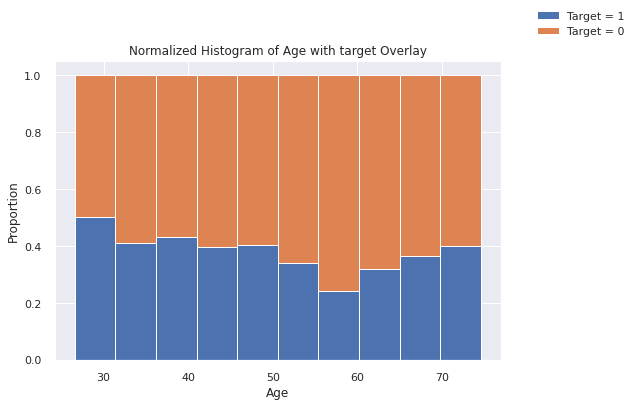

In [21]:
sns.set_theme(style = "darkgrid")
# Create normalized histogram for age groups by target overlay
n_table = np.column_stack((n[0], n[1])) # stack the tables
n_norm = n_table/n_table.sum(axis =1)[:, None] # create normalized tables by sum
ourbins = np.column_stack((bins[0:10], bins[1:11])) # create table bins 
p1 = plt.bar(x = ourbins[:,0], height = n_norm[:,0], width = ourbins[:,1] - ourbins[:,0]) # first bar chart
p2 = plt.bar(x = ourbins[:,0], height = n_norm[:,1], width = ourbins[:,1] - ourbins[:,0], # second bar chart
             bottom = n_norm[:,0])
# Annotate legend, title with x and y labels
plt.legend(['Target = 1', 'Target = 0'], bbox_to_anchor=(1.3, 1.2))
plt.title('Normalized Histogram of Age with target Overlay')
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.show()

In [22]:
def age_bins(x):
    '''
    Convert age into age bins 
    '''
    if x < 60: 
        return 'under 60s'
    else:
        return 'over 60s'

In [23]:
age_df = df[['age','target']]
age_df['age'] = age_df.apply(lambda x: age_bins(x['age']), axis = 1)
age_df['age'] = pd.Categorical(age_df['age'],
                                   categories=['under 60s', 'over 60s'],
                                   ordered=True)
age_df.head()

,age,target
0,over 60s,1
1,under 60s,1
2,under 60s,1
3,under 60s,1
4,under 60s,1


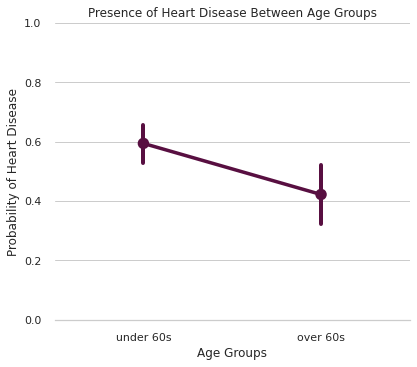

In [24]:
sns.set_theme(style="whitegrid")

# Set up a grid to plot heart disease probability against age
g = sns.PairGrid(age_df, y_vars="target",
                 x_vars=["age"],
                 height=5, aspect=1.2)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, scale=1.3, errwidth=4, color="xkcd:plum")
g.set(ylim=(0, 1))
g.axes[0,0].set_title("Presence of Heart Disease Between Age Groups")
g.axes[0,0].set_xlabel('Age Groups')
g.axes[0,0].set_ylabel('Probability of Heart Disease')
#g.axes[0,1].set_xlabel('axes label 2')
sns.despine(fig=g.fig, left=True)

#### 3.2 Exploring Resting Blood Pressure

In [25]:
# Selecting only these variables
bps_df = df[['age', 'trestbps', 'target']]
bps_df.head()

,age,trestbps,target
0,63,145,1
1,37,130,1
2,41,130,1
3,56,120,1
4,57,120,1


In [26]:
 # call function onto column values for age
bps_df['age'] = bps_df.apply(lambda x: age_bins(x['age']), axis = 1)
bps_df.head()

,age,trestbps,target
0,over 60s,145,1
1,under 60s,130,1
2,under 60s,130,1
3,under 60s,120,1
4,under 60s,120,1


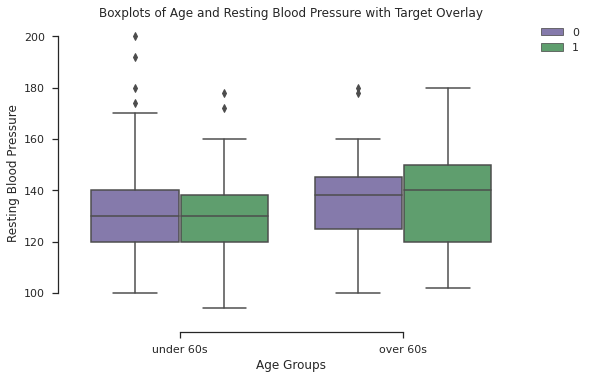

In [27]:
sns.set_theme(style = "ticks")

# Draw nested boxplot for age groups by resting blood pressure with taret overlay
ax = sns.boxplot(x = 'age', y = 'trestbps', hue = 'target',
           palette = ['m', 'g'],
           data = bps_df, order = ['under 60s', 'over 60s'])
sns.despine(offset = 10, trim = True) # move position of graph
plt.legend(bbox_to_anchor = (1.05,1), loc = 2, borderaxespad = 0.) #legend
# Annotate the title and x and y-axis
plt.title('Boxplots of Age and Resting Blood Pressure with Target Overlay')
plt.xlabel('Age Groups')
plt.ylabel('Resting Blood Pressure')
plt.show()

#### 3.3 Exploring Sex 

In [28]:
# Select only these variables
sex = df[['sex','trestbps', 'target']]
sex.head()

,sex,trestbps,target
0,male,145,1
1,male,130,1
2,female,130,1
3,male,120,1
4,female,120,1


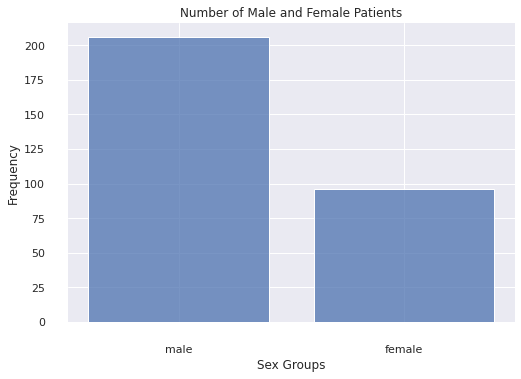

In [29]:
# Look at the frequency between sex
sns.set_theme(style = "darkgrid")
# Bar chart of frequency by sex
sns.histplot(data = sex, x = 'sex', multiple = 'dodge', shrink = .8)
sns.despine(offset = 10, trim = True)
plt.title('Number of Male and Female Patients')
plt.xlabel('Sex Groups')
plt.ylabel('Frequency')
plt.show()

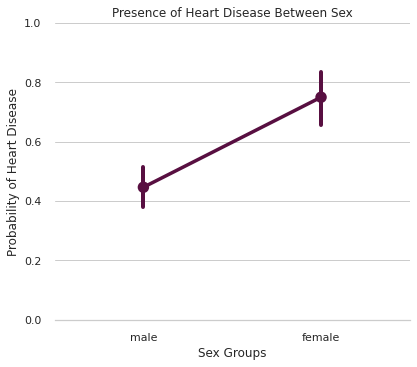

In [30]:
sns.set_theme(style="whitegrid")

# Set up a grid to plot heart disease probability against sex
g = sns.PairGrid(sex, y_vars="target",
                 x_vars=["sex"],
                 height=5, aspect=1.2)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, scale=1.3, errwidth=4, color="xkcd:plum")
g.set(ylim=(0, 1))
g.axes[0,0].set_title("Presence of Heart Disease Between Sex")
g.axes[0,0].set_xlabel('Sex Groups')
g.axes[0,0].set_ylabel('Probability of Heart Disease')
#g.axes[0,1].set_xlabel('axes label 2')
sns.despine(fig=g.fig, left=True)

#### 3.4 Exploring Sex and Age

In [31]:
# Select only these variables
sex_age_df = df[['age', 'sex','target']] 
sex_age_df.head()

,age,sex,target
0,63,male,1
1,37,male,1
2,41,female,1
3,56,male,1
4,57,female,1


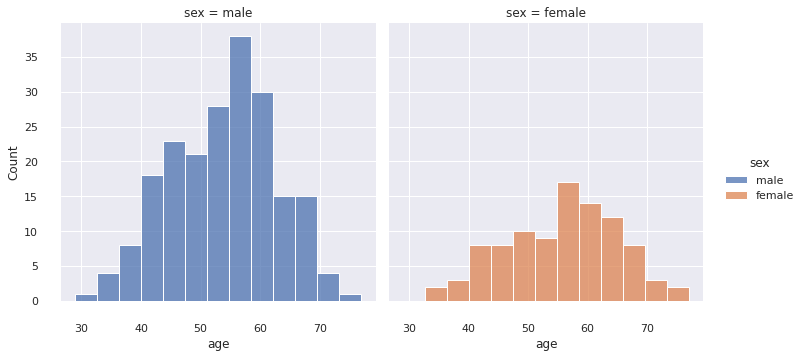

In [32]:
# Look at the frequency of age bins by gender
sns.set_theme(style = "darkgrid")
g = sns.displot(sex_age_df, x = 'age', col = 'sex', hue ='sex', multiple ='dodge')
g = sns.despine(offset = 10, trim = True)
plt.show()

#### 3.5 Exploring Maximum Heart Rate ("Thalach")

In [33]:
# Select only these variables
thalach_df = df[['age','sex', 'thalach','target']]
thalach_df.head()

,age,sex,thalach,target
0,63,male,150,1
1,37,male,187,1
2,41,female,172,1
3,56,male,178,1
4,57,female,163,1


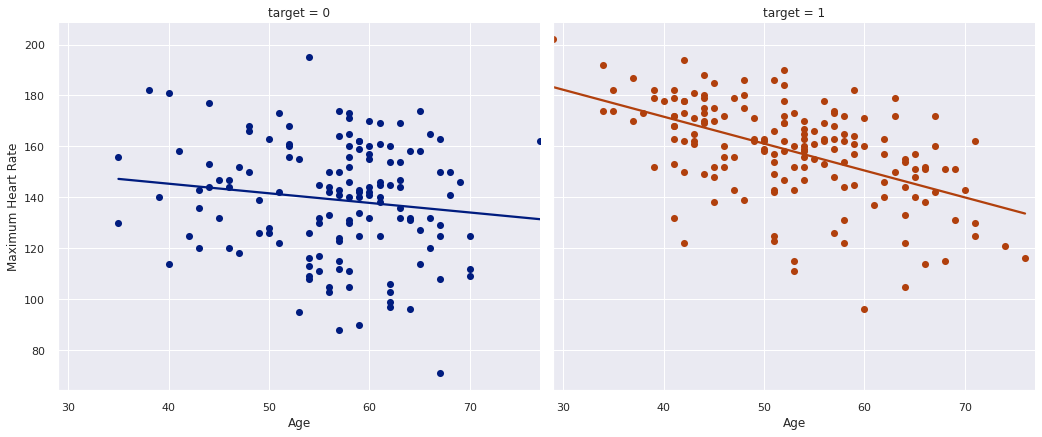

In [34]:
# plot a scatter plot and find the trend between age, and maximum heart rate with target overlay
g = sns.lmplot(x="age", y="thalach", col="target", hue="target", data=thalach_df,
           col_wrap=2, ci=None, palette="dark", height=6, aspect = 1.2,
           scatter_kws={"s": 50, "alpha": 1})
g.set_axis_labels("Age", "Maximum Heart Rate")
plt.show()

#### 3.6 Exploring Exercise Induced Angina -  "exang" variable 

In [35]:
exang_df = df[['exang','target']] # look at exang and target variables
exang_df.head()

,exang,target
0,No Ex Angina,1
1,No Ex Angina,1
2,No Ex Angina,1
3,No Ex Angina,1
4,Exercise Angina,1


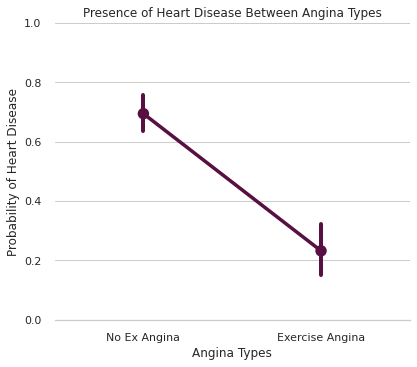

In [36]:
sns.set_theme(style="whitegrid")

# Set up a grid to plot heart disease probability against Chest Pain Angina Types
g = sns.PairGrid(exang_df, y_vars="target",
                 x_vars=["exang"],
                 height=5, aspect=1.2)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, scale=1.3, errwidth=4, color="xkcd:plum")
g.set(ylim=(0, 1))
g.axes[0,0].set_title("Presence of Heart Disease Between Angina Types")
g.axes[0,0].set_xlabel('Angina Types')
g.axes[0,0].set_ylabel('Probability of Heart Disease')
#g.axes[0,1].set_xlabel('axes label 2')
sns.despine(fig=g.fig, left=True)

#### 3.7 Find the correlaiton between all variables 

In [37]:
# Look at only continuous variables
corr_df = df[['age','trestbps','chol','thalach','oldpeak']]
corr_df.head()

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.283121,0.207216,-0.395235,0.206040
trestbps,0.283121,1.000000,0.125256,-0.048023,0.194600
chol,0.207216,0.125256,1.000000,-0.005308,0.050086
thalach,-0.395235,-0.048023,-0.005308,1.000000,-0.342201
oldpeak,0.206040,0.194600,0.050086,-0.342201,1.000000


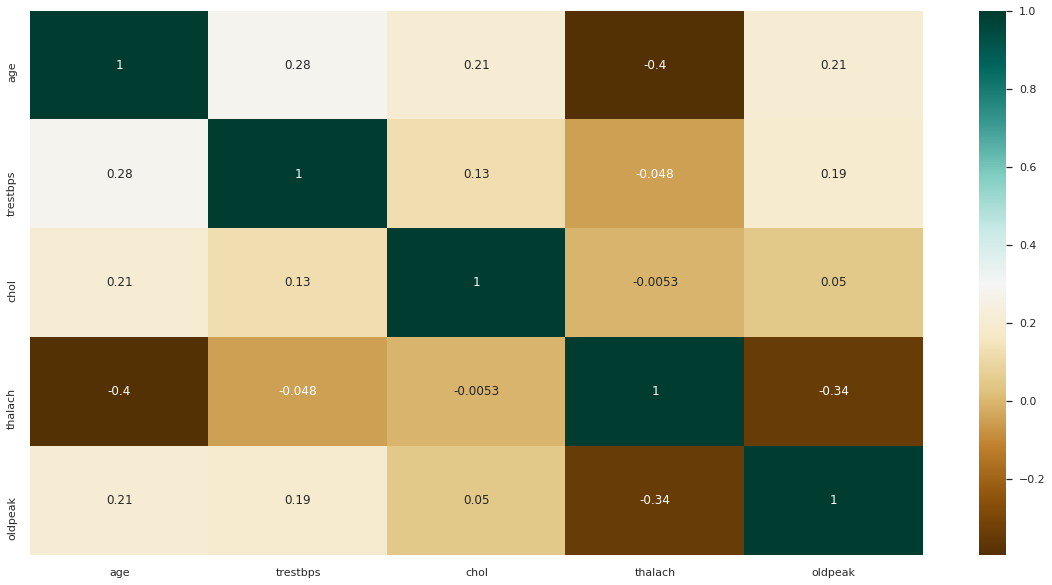

In [38]:
#Find relationship between all variables
plt.figure(figsize=(20,10))
# Create a correlation matrix
c = corr_df.corr()
# Plot heat map of correlation matrix
sns.heatmap(c,cmap='BrBG',annot=True)
# print correlation matrix as well
c

-----------
### 4. Setup Phase
- After exploring the data, we want to create a pipeline for all the necessary cleaning we have done into a function 
- By doing so, we will be aware of what went through the data cleaning process and have it all in one place
- The following funciton will call the original data, then one hot label encode the categorical variables and finally standardization before splitting the data into train and test sets.

In [39]:
def preprocessing(): 
    # read original data 
    df = pd.read_csv("heart.csv")
    
    # Drop Duplicate Rows 
    # return a new dataframe by dropping a 
    # row 'c' from dataframe
    df = df.drop(dup_index)

    # returns empty data frame because there are no longer any duplicate rows
    df[df.duplicated(keep = 'first')]

    # One Hot label encoding
    a = pd.get_dummies(df['cp'], prefix = "cp") # get dummy variables for chest pain
    b = pd.get_dummies(df['thal'], prefix = "thal") # get dummy variables for thal
    c = pd.get_dummies(df['slope'], prefix = "slope") # get dummy variables for slope
    d = pd.get_dummies(df['restecg'], prefix = "restecg") # get dummy variables for restecg
    frames = [df, a, b, c, d] # append them as a list
    df = pd.concat(frames, axis = 1) # concate the list into a data frame
    df = df.drop(columns = ['cp', 'thal', 'slope', "restecg"]) # drop the original list

    # Standardize Continuous Variables using min-max scaler
    df = pd.DataFrame(MinMaxScaler().fit_transform(df), columns = df.columns)
    
    return df

In [40]:
# call preprocessing function on data frame and drop target column
X = preprocessing().drop(columns = "target") 
X.head() # show first 5 rows


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_0,...,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2,restecg_0,restecg_1,restecg_2
0,0.708333,1.0,0.481132,0.244292,1.0,0.603053,0.0,0.370968,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.885496,0.0,0.564516,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.770992,0.0,0.225806,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.816794,0.0,0.129032,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.702290,1.0,0.096774,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [41]:
# Extract target variable from preprocessed dataframe
y = preprocessing()[['target']] 
y.head()

,target
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


#### 4.1 Check for class imbalance problem

In [42]:
# look at the proportion of the classes in target variable
pd.DataFrame(round(y.value_counts() / len(y),2), columns =["Class Size %"])

,Class Size %
target,
1.0,0.54
0.0,0.46


**Conclusion**: There is no class imbalance problem in this data set

#### 4.2 Split data into a train-test-validation dataset

**Train Test Split**

In [43]:
# split data to training and test size with 80/20 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7) 
print('X_train.shape: ', X_train.shape) # Training Features shape
print('X_test.shape:  ', X_test.shape) # Test Features shape
print('y_train.shape: ', y_train.shape) # Training Target shape
print('y_test.shape:  ', y_test.shape) # Test Target shape

X_train.shape:  (241, 23)
X_test.shape:   (61, 23)
y_train.shape:  (241, 1)
y_test.shape:   (61, 1)


#### 4.3 Validating our partition 

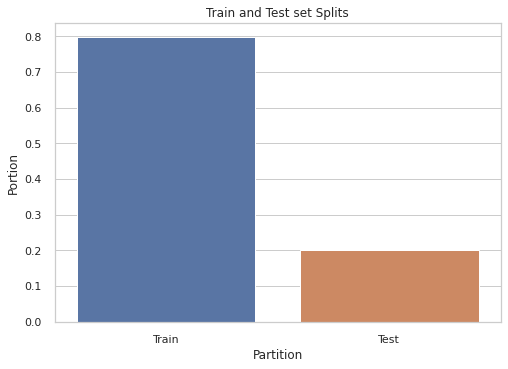

In [44]:
# create data frame for training and test partition size
part = pd.DataFrame({'Partition':['Train','Test'],
                    'Portion':[(X_train.shape[0]/df.shape[0]), 
                              (X_test.shape[0]/df.shape[0])]}) 

# plot bar chart for the size of the partition sets
sns.barplot(x="Partition", y="Portion", data=part) 
plt.title("Train and Test set Splits")
plt.show()

**Two-sample Z-test for the difference in proportions**

In [45]:
ttest_ind(y_train['target'], y_test['target'], equal_var= False) # perform two sample t test 

Ttest_indResult(statistic=0.6058336573010887, pvalue=0.5461178160277528)

In [46]:
n1 = y_train.shape[0]
x1 = y_train.loc[y_train['target'] == 1].shape[0] # training set for positive class
p1 = x1/n1

n2 = y_test.shape[0]
x2 = y_test.loc[y_test['target'] == 1].shape[0] # test set for positive class
p2 = x2/n2

p = (x1 + x2)/ (n1 + n2)



# Calculate Z value
z = round(((p1-p2)-0)/sqrt(p*(1-p)*(1/n1+1/n2)),6)

# Calculate p-value
pval = round(2 * (1 - norm.cdf(abs(z))), 6)

print("Z-statistic = ", z, ",", "P-value = ", pval)

Z-statistic =  0.611651 , P-value =  0.540769


**Conclusion for Validating the partition**

**Null hypothesis:** Two group proportions are equal between training set and test


**Alternative hypothesis:** Two group proportions are different between training and test set



**Conclusion:** The p value obtained from the Z-test is not significant (p > 0.05), and therefore, we failed to

reject the null hypothesis and conclude that the proportion between the training set and test of the '1' values in 
the‘Target’ column are equal

#### 4.6 Establashing Baseline Model Performance
- Baseline models for binary classification 
- Let the value of **1** from the target variable represent _positive_ and **0** represent _negative_
- Let _p_ represent the proportion of positive records in the data.


1. **All Positive Model**
- The accuracy of the all positive model is 54.3%

In [47]:
# all positive model accuracy
positive_acc = round(len(df[df['target'] == 1]) / len(df),3) 
print("All Positive Model's Accuracy:", round(positive_acc * 100,3), "%")

All Positive Model's Accuracy: 54.3 %


2. **All Negative Model**
- The accuracy of the all negative model is 45.7%

In [48]:
# all negative model accuracy
negative_acc = round(1- positive_acc,3) 
print("All Negative Model's Accuracy:", round(negative_acc * 100,3), "%")

All Negative Model's Accuracy: 45.7 %


**Conclusion for Baseline Model Performance:**
- _Any model that we develope will need to beat this 45.8% accuracy to be considered useful._

-----
### 5. Modeling Phase

#### 5.1 Gaussian Naive Bayesian Model

In [49]:
nb = GaussianNB().fit(X_train, y_train) # gaussain naive model
y_pred = nb.predict(X_test) # model predictions
y_pred

array([0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 1.])

#### 5.2 Logistic Regression Model

In [50]:
X_train_log, X_test_log, y_train_log, y_test_log= train_test_split(X,y, test_size=0.2, random_state=7) # split data for log model
print('X_train.shape: ', X_train_log.shape)
print('X_test.shape:  ', X_test_log.shape)
print('y_train.shape: ', y_train_log.shape)
print('y_test.shape:  ', y_test_log.shape)

X_train.shape:  (241, 23)
X_test.shape:   (61, 23)
y_train.shape:  (241, 1)
y_test.shape:   (61, 1)


In [51]:
logit = LogisticRegression().fit(X_train_log, y_train_log) # fit log model to training data 
thres = 0.7# threshold
y_pred_log = np.where(logit.predict_proba(X_test_log)[:,1] > thres, 1, 0) # convert probabilities to positive class if pass threshold
y_pred_log

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

#### 5.3 Random Forest Model

In [52]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf= train_test_split(X,y, test_size=0.2, random_state=7) # split data for random forest model
print('X_train.shape: ', X_train_rf.shape)
print('X_test.shape:  ', X_test_rf.shape)
print('y_train.shape: ', y_train_rf.shape)
print('y_test.shape:  ', y_test_rf.shape)

X_train.shape:  (241, 23)
X_test.shape:   (61, 23)
y_train.shape:  (241, 1)
y_test.shape:   (61, 1)


In [53]:
rf = RandomForestClassifier(n_jobs=2, random_state=0).fit(X_train_rf, y_train_rf) # fit random forest model to training data
y_pred_rf = rf.predict(X_test_rf) # random forest predictions
y_pred_rf

array([0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 1.])

-----------
### 6. Model Evaluation Phase

#### 6.1 Gaussian Naive Bayes Model 

In [54]:
# create contingency table for gaussian naive bayes mdoel
cont_table = pd.crosstab(y_test['target'], y_pred,
                        rownames = ['Actual'],
                        colnames = ['Predicted']) 
# Create a total column
cont_table['Total'] = cont_table.sum(axis = 1)
cont_table.loc['Total'] = cont_table.sum()
cont_table

Predicted,0.0,1.0,Total
Actual,,,
0.0,25,5,30
1.0,3,28,31
Total,28,33,61


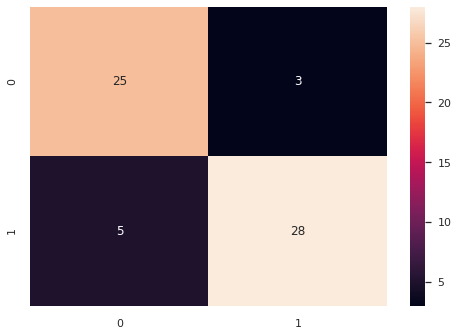

In [55]:
# naive bayes confusion matrix plot
conf_matrix = confusion_matrix(y_pred, y_test) 
# plot heat map
sns.heatmap(conf_matrix, annot=True) 
plt.show()

In [56]:
#generating a report to extract the measure of interest using built-in sklearn function
nb_report = classification_report(y_test,y_pred,digits=3,output_dict = True)

print("Guassian Naive Bayes Model:")
print("Accuracy = {0:0.3f}".format(nb_report["accuracy"])) # accuracy
print("Precision = {0:0.3f}".format(nb_report["1.0"]["precision"])) # precision
print("Specificity = {0:0.3f}".format(nb_report["0.0"]["recall"])) # specificity 
print("Sensitivity = {0:0.3f}".format(nb_report["1.0"]["recall"])) # sensitivity
print("F1-score = {0:0.3f}".format(nb_report["1.0"]["f1-score"])) # f1-score


Guassian Naive Bayes Model:
Accuracy = 0.869
Precision = 0.848
Specificity = 0.833
Sensitivity = 0.903
F1-score = 0.875


#### 6.2 Logistic Regression Model 

In [57]:
# logistic regression contingency model
cont_table_log = pd.crosstab(y_test_log['target'], y_pred_log,
                        rownames = ['Actual'],
                        colnames = ['Predicted']) 
# create a total column 
cont_table_log['Total'] = cont_table_log.sum(axis = 1)
cont_table_log.loc['Total'] = cont_table_log.sum()
cont_table_log

Predicted,0,1,Total
Actual,,,
0.0,28,2,30
1.0,8,23,31
Total,36,25,61


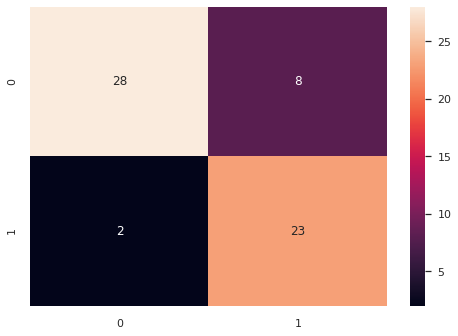

In [58]:
# confusion matrix for log model
conf_matrix_log = confusion_matrix(y_pred_log, y_test_log) 
# plot heat map
sns.heatmap(conf_matrix_log, annot=True)
plt.show()

In [59]:
#generating a report to extract the measure of interest using built-in sklearn function
log_report = classification_report(y_test_log,y_pred_log,digits=3,output_dict = True)

print("Logistic Regression Model:")
print("Accuracy = {0:0.3f}".format(log_report["accuracy"])) # accuracy
print("Precision = {0:0.3f}".format(log_report["1.0"]["precision"])) # precision 
print("Specificity = {0:0.3f}".format(log_report["0.0"]["recall"])) # specificity
print("Sensitivity = {0:0.3f}".format(log_report["1.0"]["recall"])) # sensitivity (recall)
print("F1-score = {0:0.3f}".format(log_report["1.0"]["f1-score"])) # f1 score


Logistic Regression Model:
Accuracy = 0.836
Precision = 0.920
Specificity = 0.933
Sensitivity = 0.742
F1-score = 0.821


#### 6.3 Random Forest Model

In [60]:
# contingency table for random forest model
cont_table_rf = pd.crosstab(y_test_rf['target'], y_pred_rf,
                        rownames = ['Actual'],
                        colnames = ['Predicted'])
# Create a total column
cont_table_rf['Total'] = cont_table_rf.sum(axis = 1)
cont_table_rf.loc['Total'] = cont_table_rf.sum()
cont_table_rf

Predicted,0.0,1.0,Total
Actual,,,
0.0,23,7,30
1.0,4,27,31
Total,27,34,61


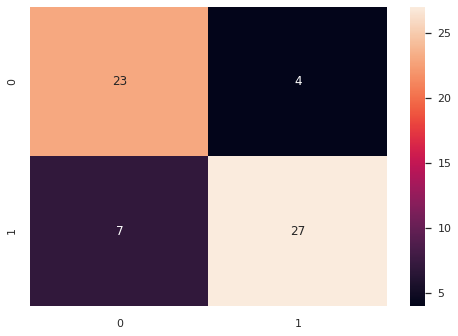

In [61]:
conf_matrix_rf = confusion_matrix(y_pred_rf, y_test_rf) # confusion matrix for random forest
# Plot a heat map
sns.heatmap(conf_matrix_rf, annot=True)
plt.show()

In [62]:
#generating a report to extract the measure of interest using built-in sklearn function
rf_report = classification_report(y_test_rf,y_pred_rf,digits=3,output_dict = True)

print("Random Forest Model:")
print("Accuracy = {0:0.3f}".format(rf_report["accuracy"])) # accuracy 
print("Precision = {0:0.3f}".format(rf_report["1.0"]["precision"])) # precision 
print("Specificity = {0:0.3f}".format(rf_report["0.0"]["recall"])) # specificity 
print("Sensitivity = {0:0.3f}".format(rf_report["1.0"]["recall"])) # sensitivity (recall)
print("F1-score = {0:0.3f}".format(rf_report["1.0"]["f1-score"])) # f1-score


Random Forest Model:
Accuracy = 0.820
Precision = 0.794
Specificity = 0.767
Sensitivity = 0.871
F1-score = 0.831


#### 6.4 Cross-Validation Scores

#####  a) Gaussian Naive Bayes

In [63]:
k = 10 # number of K folds

# Cross-Validate 
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model: gaussian naive bayes
nb_acc = round(cross_val_score(nb, X, y, scoring='accuracy', cv=cv).mean(), 3) # kfold accuracy
nb_precis = round(cross_val_score(nb, X, y, scoring='precision', cv=cv).mean(), 3) # kfold precision
nb_recall = round(cross_val_score(nb, X, y, scoring='recall', cv=cv).mean(), 3) # kfold recall

# report performance of average accuracy
print("Guassian Naive Bayes' Average accuracy: {}".format(nb_acc)) 
# report performance of average precision
print("Guassian Naive Bayes' Average precision: {}".format(nb_precis))
# report performance of average recall
print("Guassian Naive Bayes' Average recall: {}".format(nb_recall))

Guassian Naive Bayes' Average accuracy: 0.798
Guassian Naive Bayes' Average precision: 0.792
Guassian Naive Bayes' Average recall: 0.853


##### b) Logistic Regression Model

In [64]:
k = 10 # number of K folds

# Cross-Validate 
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model: logistic regression
log_acc = round(cross_val_score(logit, X, y, scoring='accuracy', cv=cv).mean(), 3) # kfold accuracy
log_precis = round(cross_val_score(logit, X, y, scoring='precision', cv=cv).mean(), 3) # kfold precision
log_recall = round(cross_val_score(logit, X, y, scoring='recall', cv=cv).mean(), 3) # kfold recall

# report performance of average accuracy
print("Logistic Regression's Average accuracy: {}".format(log_acc))
# report performance of average precision
print("Logistic Regression's Average precision: {}".format(log_precis))
# report performance of average recall
print("Logistic Regression's Average recall: {}".format(log_recall))

Logistic Regression's Average accuracy: 0.835
Logistic Regression's Average precision: 0.828
Logistic Regression's Average recall: 0.87


##### c) Random Forest Model

In [65]:
k = 10 # number of K folds

# Cross-Validate 
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model: random forest
rf_acc = round(cross_val_score(rf, X, y, scoring='accuracy', cv=cv).mean(), 3) # kfold accuracy
rf_precis = round(cross_val_score(rf, X, y, scoring='precision', cv=cv).mean(), 3) # kfold precision
rf_recall = round(cross_val_score(rf, X, y, scoring='recall', cv=cv).mean(), 3) # kfold recall

# report performance of average accuracy
print("Random Forest's Average accuracy: {}".format(rf_acc))
# report performance of average precision
print("Random Forest's Average precision: {}".format(rf_precis))
# report performance of average recall
print("Random Forest's Average recall: {}".format(rf_recall))

Random Forest's Average accuracy: 0.808
Random Forest's Average precision: 0.806
Random Forest's Average recall: 0.844


#### 6.5 Evaluation measure of All Models

In [66]:
def eval_report(report):
    '''
    Calculate Accuracy, error-rate, recall, specificity,
    precision, f1, f2, and f 0.5 score for model reports as input
    and return the evaluation metrics as a list
    '''
    accuracy = round(report["accuracy"],3) # accuracy
    error_rate = round(1 - accuracy,3) # error rate
    sensitivity = round(report["1.0"]["recall"],3) # recall
    specificity = round(report["0.0"]["recall"],3) # specificity
    precision = round(report["1.0"]["precision"],3) # precision
    f1 = round(report["1.0"]["f1-score"],3) # f1 score
    f2 = round(5 * ((precision * sensitivity)/ ((4 * precision) + sensitivity)),3) # f2  score
    f05 = round(1.25 * ((precision * sensitivity)/ ((0.25 * precision) + sensitivity)),3) # f 0.5 score
    return [accuracy, error_rate, sensitivity, specificity, precision, f1, f2, f05] # return everything as a list


In [67]:
eval_measure = ['Accuracy','Error Rate', 'Sensitivity', 
                'Specificity', 'Precision', 'F1', 'F2', 'F 0.5'] # first column as metrics
nb_measure = eval_report(nb_report) # gnb model 
log_measure = eval_report(log_report) # logistic regression model
rf_measure = eval_report(rf_report) # random forest model 


# store everything together as a list
models_eval = {"Evaluation Measure":eval_measure, "Gaussian Naive Bayes":nb_measure,
              "Logistic Regression": log_measure, 
              "Random Forest": rf_measure}
# Convert it into a data frame
models_eval_df = pd.DataFrame(models_eval)
models_eval_df

,Evaluation Measure,Gaussian Naive Bayes,Logistic Regression,Random Forest
0,Accuracy,0.869,0.836,0.820
1,Error Rate,0.131,0.164,0.180
2,Sensitivity,0.903,0.742,0.871
3,Specificity,0.833,0.933,0.767
4,Precision,0.848,0.920,0.794
5,F1,0.875,0.821,0.831
6,F2,0.891,0.772,0.854
7,F 0.5,0.858,0.878,0.808


#### 6.6 10 K-fold Performance Metrics of All Classifiers

In [68]:
# Aggregate all models and their respective 10 Kfolds evaluation metrics
models_kfolds = {"Models":['GaussianNB', 'Logistic Regression', 'Random Forest'],
              "Kfold Accuracy": [nb_acc, log_acc, rf_acc],
               "Kfold Precision":[nb_precis, log_precis, rf_precis],
               "Kfold Recall": [nb_recall, log_recall, rf_recall]
              }

models_df = pd.DataFrame(models_kfolds)
models_df

,Models,Kfold Accuracy,Kfold Precision,Kfold Recall
0,GaussianNB,0.798,0.792,0.853
1,Logistic Regression,0.835,0.828,0.870
2,Random Forest,0.808,0.806,0.844


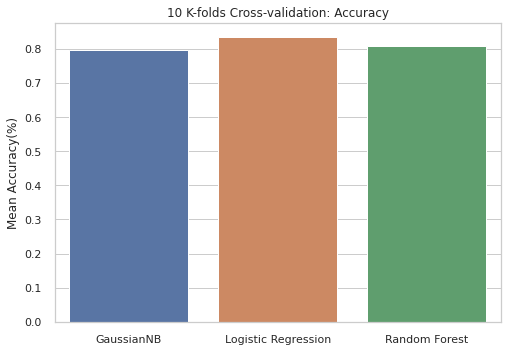

In [69]:
# visualizing accuracies for all ML Algorithms 
models = ('GaussianNB', 'Logistic Regression', 'Random Forest') # list of models
x_pos = np.arange(len(models)) #x position
accs = [nb_acc, log_acc, rf_acc] # accuracies

# Plot plot bar of 10-kfolds cross validation mean accuracy
sns.barplot(x_pos, accs) 
plt.xticks(x_pos, models)
plt.ylabel('Mean Accuracy(%)')
plt.title('10 K-folds Cross-validation: Accuracy')
plt.show()

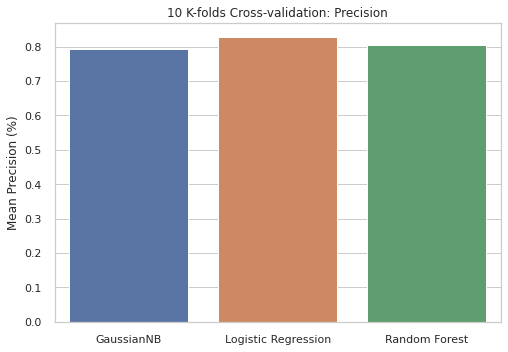

In [70]:
# visualizing accuracies for all ML Algorithms 
models = ('GaussianNB', 'Logistic Regression', 'Random Forest') # list of models
x_pos = np.arange(len(models)) # x positions
precis = [nb_precis, log_precis, rf_precis] # mean precisions

# Plot a bar chart of 10 k-fold cross-validaiton of precision for all models
sns.barplot(x_pos, precis)
plt.xticks(x_pos, models)
plt.ylabel('Mean Precision (%)')
plt.title('10 K-folds Cross-validation: Precision')
plt.show()

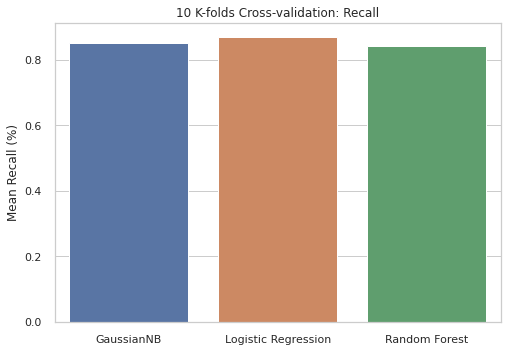

In [71]:
# visualizing accuracies for all ML Algorithms 
models = ('GaussianNB', 'Logistic Regression', 'Random Forest') # list of models
x_pos = np.arange(len(models)) # x positions by int
recall = [nb_recall, log_recall, rf_recall] # list of mean recalls 

# Plot a bar graph of 10 K-folds cross validation for mean recall
sns.barplot(x_pos, recall)
plt.xticks(x_pos, models)
plt.ylabel('Mean Recall (%)')
plt.title('10 K-folds Cross-validation: Recall')
plt.show()

#### 6.7 AUC-ROC Curve for all Models

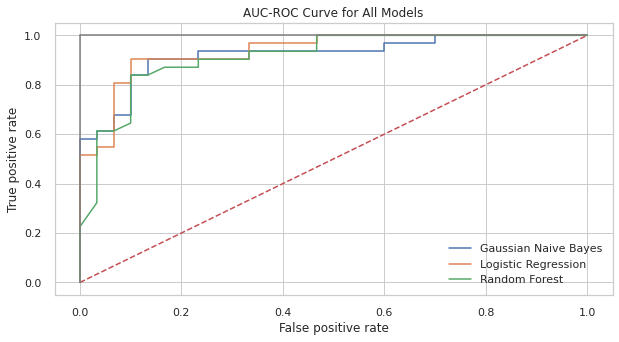

Gaussian Naive Bayes ROC curve: AUC=0.920
Logistic Regression ROC curve: AUC=0.935
Random Forest ROC curve: AUC=0.913


In [72]:
#Plotting the ROC curve

#Generating points to plot on ROC curve - Gaussian Naive Bayes
nb_pred_prob = nb.predict_proba(X_test)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb_pred_prob[:,1])

#Generating points to plot on ROC curve - Logistic Regression
log_pred_prob = logit.predict_proba(X_test_log)
fpr_log, tpr_log, thresholds_log = roc_curve(y_test_log, log_pred_prob[:,1])

#Generating points to plot on ROC curve - Random Forest
rf_pred_prob = rf.predict_proba(X_test_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_rf, rf_pred_prob[:,1])


# Plot AUC-ROC Curve for each model 
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('AUC-ROC Curve for All Models')
plt.plot(fpr_nb, tpr_nb,label='Gaussian Naive Bayes') # Gaussian Naive Bayes Model
plt.plot(fpr_log,tpr_log,label='Logistic Regression') # Logistic Regression Model
plt.plot(fpr_rf, tpr_rf,label='Random Forest') # Random Forest Model
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

print('Gaussian Naive Bayes ROC curve: AUC={0:0.3f}'.format(roc_auc_score(y_test,nb_pred_prob[:,1]))) # Naive Bayes AUC-ROC Accuracy
print('Logistic Regression ROC curve: AUC={0:0.3f}'.format(roc_auc_score(y_test_log,log_pred_prob[:,1]))) # Logistic Reression Accuracy
print('Random Forest ROC curve: AUC={0:0.3f}'.format(roc_auc_score(y_test_rf,rf_pred_prob[:,1]))) # Random Forest AUC-ROC Accuracy